In [45]:
import importlib
from recommendations import critics

critics['Lisa Rose']['Lady in the Water']
# critics

2.5

欧氏距离公式

$\sqrt[]{\displaystyle \sum^{N}_{i=1}{(x_i - y_i)^2}}$

In [4]:
from math import sqrt
1/(1+sqrt(pow(4.5-4,2) + pow(1-2,2)))

0.4721359549995794

In [8]:
import recommendations

importlib.reload(recommendations)
recommendations.sim_distance(recommendations.critics, 'Lisa Rose', 'Gene Seymour')

0.29429805508554946

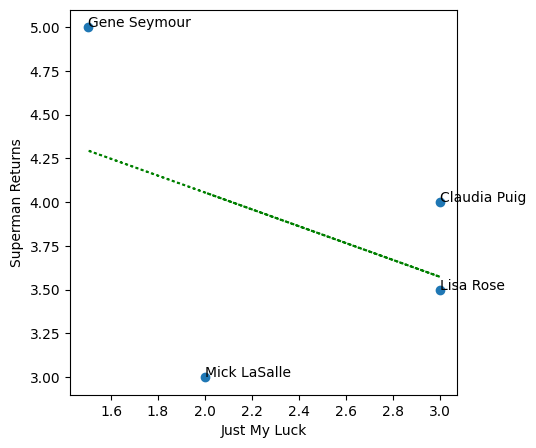

In [60]:
import matplotlib.pyplot as plt
from recommendations import critics

plt.figure(figsize=(5, 5), dpi=100)

# x = 'You, Me and Dupree'
# y = 'Snakes on a Plane'

x = 'Just My Luck'
y = 'Superman Returns'
xl = []
yl = []
for k,v in critics.items():
    if x in v and y in v:
        x1 = v[x]
        y1 = v[y]
        # print(x1, y1)
        plt.text(x1, y1, k)
        xl.append(x1)
        yl.append(y1)
    
plt.scatter(xl, yl)

coefficients = np.polyfit(xl, yl, 1) # 1次多项式拟合
p = np.poly1d(coefficients)
plt.plot(xl, p(xl), color='g', label='Fitted line', linestyle=':')

plt.xlabel(x)
plt.ylabel(y)
plt.show()

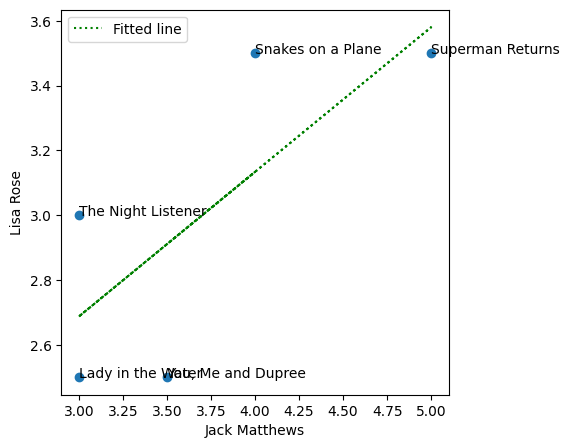

In [44]:
import matplotlib.pyplot as plt
from recommendations import critics
import numpy as np

# xu = 'Mick LaSalle'
# yu = 'Gene Seymour'

xu = 'Jack Matthews'
# xu = 'Toby'
yu = 'Lisa Rose'


plt.figure(figsize=(5, 5), dpi=100)


xl = []
yl = []
for m, s in critics[xu].items():
    x = s
    if m in critics[yu]:
        y = critics[yu][m]
        xl.append(x)
        yl.append(y)
        plt.text(x, y, m)



plt.scatter(xl, yl)
coefficients = np.polyfit(xl, yl, 1) # 1次多项式拟合
p = np.poly1d(coefficients)
plt.plot(xl, p(xl), color='g', label='Fitted line', linestyle=':')
plt.legend()

plt.xlabel(xu)
plt.ylabel(yu)
plt.show()

In [53]:
# 根据 相似性 * 分数 加权进行物品打分后推荐
import recommendations as r

# r.top_matches(critics, 'Toby', 3)
# 默认皮尔逊
r.get_recommendations(critics, 'Toby')

[(3.3477895267131017, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [52]:
import recommendations as r

# 用欧式距离
r.get_recommendations(critics, 'Toby', similarity=r.sim_distance)

[(3.457128694491423, 'The Night Listener'),
 (2.778584003814924, 'Lady in the Water'),
 (2.422482042361917, 'Just My Luck')]

In [73]:
import recommendations as r
import importlib
importlib.reload(recommendations)

# 字典格式转化为{电影名 - 某人:评分)
movies = r.transform_prefs(critics)
movies
r.get_recommendations(movies, 'Just My Luck')
# r.top_matches(movies, 'Superman Returns')
# r.top_matches(movies, 'Just My Luck')


[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

In [20]:
import recommendations as r
import delicious as d
import random

ud = d.generate_data()
# python3 dict_keys 需要转list
u = list(ud.keys())[random.randint(0, len(ud) - 1)]
# 相似用户
# r.top_matches(ud, u)
# 推荐链接
# r.get_recommendations(ud, u)[0:10]
url = r.get_recommendations(ud, u)[0][1]
# 数据转置成{链接:{人:Bool}}
r.top_matches(r.transform_prefs(ud), url)

[(0.4472135954999579, 'https://www.ign.com/'),
 (0.4152273992686999, 'https://www.bing.com/'),
 (0.4152273992686999, 'https://www.baidu.com/'),
 (0.3876990572676327, 'https://www.stereogum.com/'),
 (0.23904572186687872, 'https://www.pcworld.com/')]

In [44]:
import recommendations as r
import importlib
importlib.reload(recommendations)

#计算每个物品的top n相似物品
item_sim = r.calculate_similar_items(r.critics)

# 利用物品相似度给Toby推荐物品
r.get_recommended_items(r.critics, item_sim, 'Toby')

[(3.610031066802183, 'Lady in the Water'),
 (3.5313950341859766, 'The Night Listener'),
 (2.960999860724268, 'Just My Luck')]

In [3]:
import movie_lens as m
import recommendations as r

import importlib
importlib.reload(m)

# 加载{用户:电影:评分}
# prefs = m.load_movies_lens_pd()
# prefs[87]
# 给userId = 87 的用户推荐电影
# r.get_recommendations(prefs, 87)[0:30]
# 首次计算后会存入文件，后面再调用就很快了
item_sim = r.calculate_similar_items(None, n=20, file_name="./movie_sims.json")
# item_sim
r.get_recommended_items(prefs, item_sim, 87)[0:30]

[(5.0, 'Zebraman (2004)'),
 (5.0, 'Zazie dans le métro (1960)'),
 (5.0, 'Zathura (2005)'),
 (5.0, 'You Can Count on Me (2000)'),
 (5.0, 'Year One (2009)'),
 (5.0, 'Wind Rises, The (Kaze tachinu) (2013)'),
 (5.0, 'This Is the End (2013)'),
 (5.0, 'Them! (1954)'),
 (5.0, 'Tears of the Sun (2003)'),
 (5.0, 'Stepmom (1998)'),
 (5.0, 'Spider (2002)'),
 (5.0, 'Shut Up & Sing (2006)'),
 (5.0, 'Session 9 (2001)'),
 (5.0, 'Red Cliff Part II (Chi Bi Xia: Jue Zhan Tian Xia) (2009)'),
 (5.0, 'Red Cliff (Chi bi) (2008)'),
 (5.0, 'Rambo (Rambo 4) (2008)'),
 (5.0, 'Pumpkin (2002)'),
 (5.0, 'Percy Jackson & the Olympians: The Lightning Thief (2010)'),
 (5.0, 'Penguins of Madagascar (2014)'),
 (5.0, 'Odd Couple, The (1968)'),
 (5.0, 'Nebraska (2013)'),
 (5.0, 'Namesake, The (2006)'),
 (5.0, 'Mystery, Alaska (1999)'),
 (5.0, 'My Left Foot (1989)'),
 (5.0, 'Monuments Men, The (2014)'),
 (5.0, 'Million Dollar Hotel, The (2001)'),
 (5.0, 'Midnight Special (2015)'),
 (5.0, 'Marathon Man (1976)'),
 (5.0, 'Ma